![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [21]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


**1 - Perform preprocessing steps on the dataset to create dummy variables**

Using get dummies method on the categorical feature

In [22]:
penguins_df = pd.get_dummies(penguins_df)
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


Standardizing/scaling before clustering

In [23]:
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_df)
penguins_scaled

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801, -0.99399394,
         0.99399394],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747,  1.00604235,
        -1.00604235],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343,  1.00604235,
        -1.00604235],
       ...,
       [ 1.17168063, -0.74234736,  1.50013355,  1.91707363, -0.99399394,
         0.99399394],
       [ 0.21654349, -1.20215952,  0.78660298,  1.23396768,  1.00604235,
        -1.00604235],
       [ 1.07984052, -0.53798639,  0.85795603,  1.48236985, -0.99399394,
         0.99399394]])

**2 - Detect the optimal number of clusters for k-means clustering**

Perform Elbow analysis to determine the optimal number of clusters for this dataset

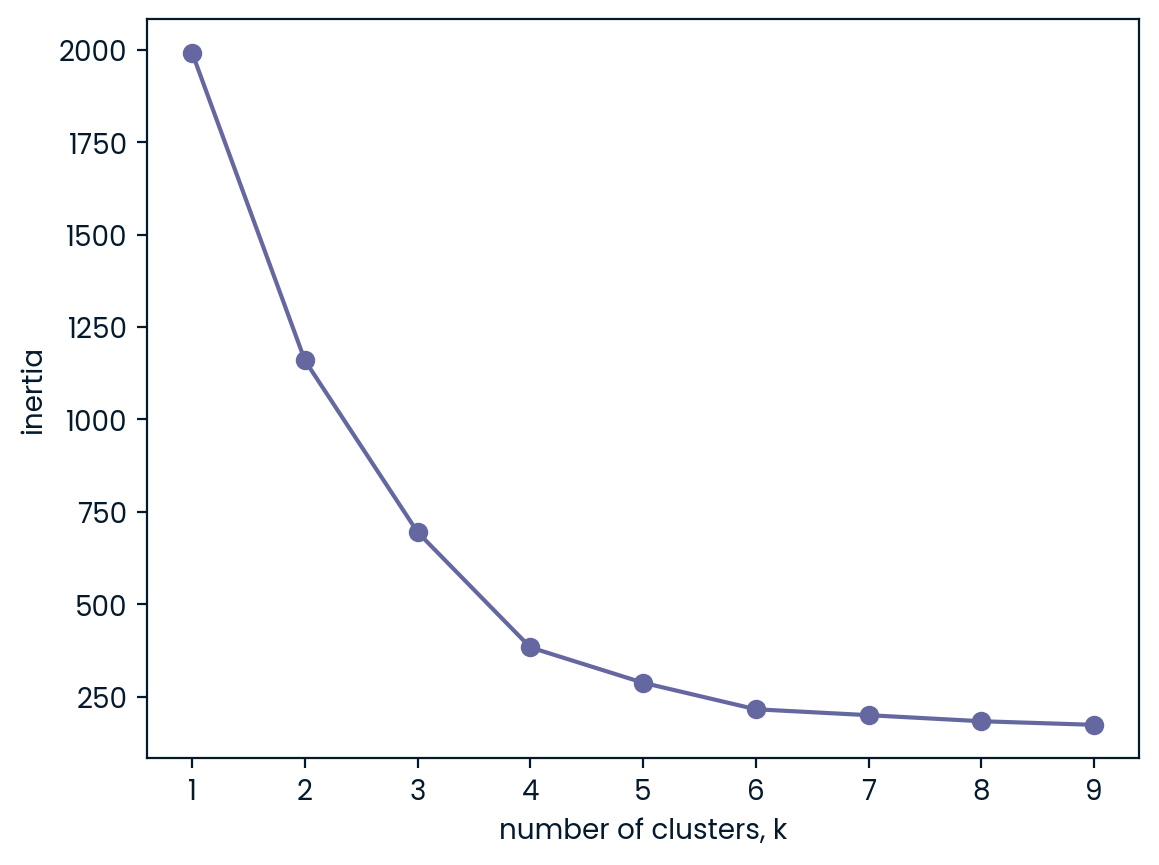

In [24]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(penguins_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

**3 - Run the k-means clustering algorithm**

In [25]:
k = 4
model = KMeans(n_clusters = k)
labels = model.fit_predict(penguins_scaled)
labels

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 3, 2, 3, 3, 2, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3,
       3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,

**4 - Create a final statistical DataFrame for each cluster**

In [26]:
penguins_df['cluster'] = labels
stat_penguins = penguins_df.groupby('cluster')[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
cluster,,,,
0,40.217757,17.611215,189.046729,3419.158879
1,43.878302,19.111321,194.764151,4006.603774
2,45.563793,14.237931,212.706897,4679.741379
3,49.473770,15.718033,221.540984,5484.836066
